In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

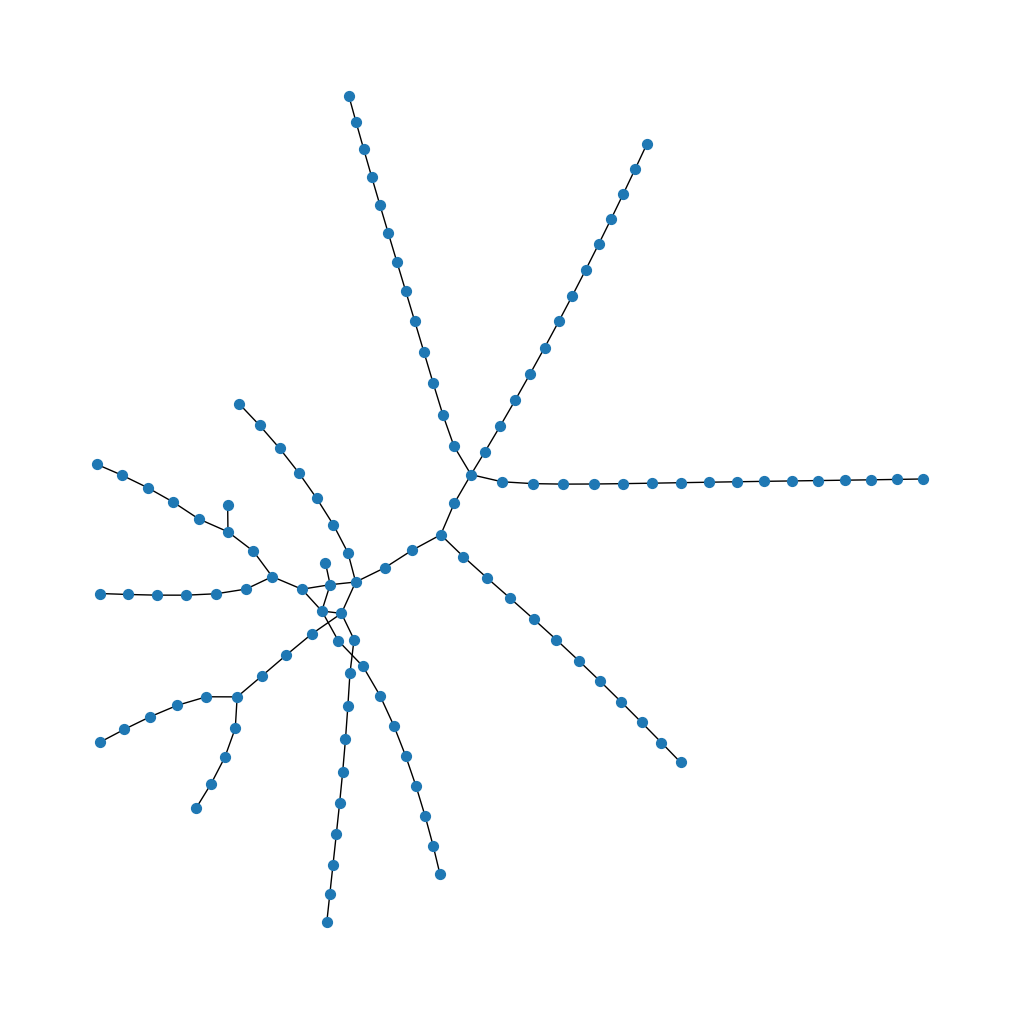

In [2]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        edges.add((stop_name, next_stop_name))
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw(network, layout, node_size=50)

In [3]:
NL = list(network)
NL

['Babcock Street',
 'Beachmont',
 'Haymarket',
 'Boylston',
 'Brookline Village',
 'Downtown Crossing',
 'Symphony',
 'Gilman Square',
 'Summit Avenue',
 'Chestnut Hill Avenue',
 'Brigham Circle',
 'Allston Street',
 'Ball Square',
 'Chinatown',
 'Wood Island',
 'Coolidge Corner',
 'Malden Center',
 'Chestnut Hill',
 'Newton Centre',
 'Reservoir',
 'Washington Square',
 'Bowdoin',
 'Northeastern University',
 'Maverick',
 'Park Street',
 'Union Square',
 'Quincy Center',
 'Brookline Hills',
 'Magoun Square',
 'Cleveland Circle',
 'Saint Paul Street',
 'Orient Heights',
 'Charles/MGH',
 'Shawmut',
 'North Station',
 'Medford/Tufts',
 'Kenmore',
 "Saint Mary's Street",
 'Englewood Avenue',
 'Andrew',
 'Wollaston',
 'Washington Street',
 'Ruggles',
 'Tappan Street',
 'Amory Street',
 'Harvard Avenue',
 'Waban',
 'Assembly',
 'Tufts Medical Center',
 'Lechmere',
 'Fairbanks Street',
 'Central',
 'Heath Street',
 'South Street',
 'Brandon Hall',
 'Porter',
 'Quincy Adams',
 'Jackson Square'

In [4]:
def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []

    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))

    return NL_indices


def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []

    for i in index_list:
        station_list.append(NL[i])

    return station_list


def rlp(f, adjacency, epsilon, max_l=3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))

    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l) * f @ np.linalg.matrix_power(adjacency, l + 1)
        s_rlp = np.add(s_rlp, summation_iteration)

    return s_rlp


def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """

    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list

    indices = list(np.nonzero(array)[1])

    values = []
    for i in indices:
        values.append(array[0][i])

    stations = index_to_station_id(indices)

    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key=lambda x: x[1])

    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])

    return station_sorted


In [5]:


# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
print(f"TD Garden - North Station, index {NL.index('North Station')}")
print(f"Big Night Live - North Station, index {NL.index('North Station')}")
print(f"Fenway Park - Kenmore, index {NL.index('Kenmore')}")
print(f"Harvard Stadium - Harvard Ave, index {NL.index('Harvard')}")

Destination_station_ids = ['North Station', 'Kenmore', 'Harvard']

TD Garden - North Station, index 34
Big Night Live - North Station, index 34
Fenway Park - Kenmore, index 36
Harvard Stadium - Harvard Ave, index 109


In [8]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.9


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

('Brookline Village',
 'Downtown Crossing',
 'Bowdoin',
 'Park Street',
 'Union Square',
 'Charles/MGH',
 'Assembly',
 'Arlington',
 'Alewife',
 'East Somerville',
 'Aquarium',
 'Prudential',
 'Kent Street',
 'Boston University Central',
 'Lechmere',
 'Sullivan Square',
 'Hawes Street',
 'Kendall/MIT',
 'Longwood',
 'Copley',
 'Davis',
 'Boston University East',
 'State',
 'Government Center',
 'Harvard',
 'North Station',
 'Central',
 'Porter',
 'Kenmore',
 'Community College',
 'Science Park/West End',
 'Haymarket',
 "Saint Mary's Street",
 'Fenway',
 'Hynes Convention Center',
 'Blandford Street')

# Ok Now Onto the New Stuff

Let's figure out how to get delay data working...

In [9]:
import json

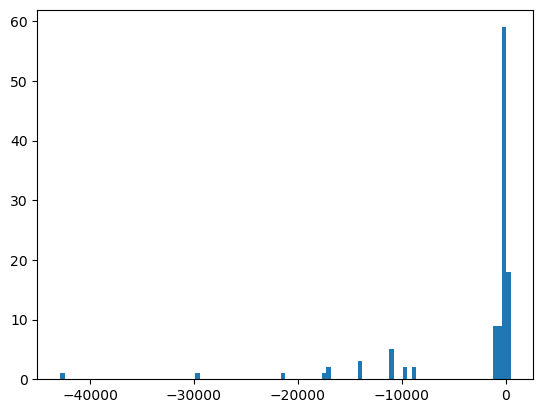

In [11]:
delays_file = open("../delay_data/named_rapid_transit_delays.json", 'r')
delays_json = delays_file.read()
delays_file.close()

delays = json.loads(delays_json)
fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

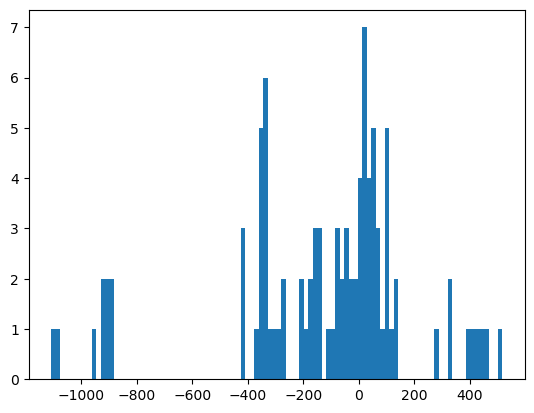

In [12]:
# remove outliers
delays = dict((s, d) for s, d in delays.items() if d > -5000)

fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

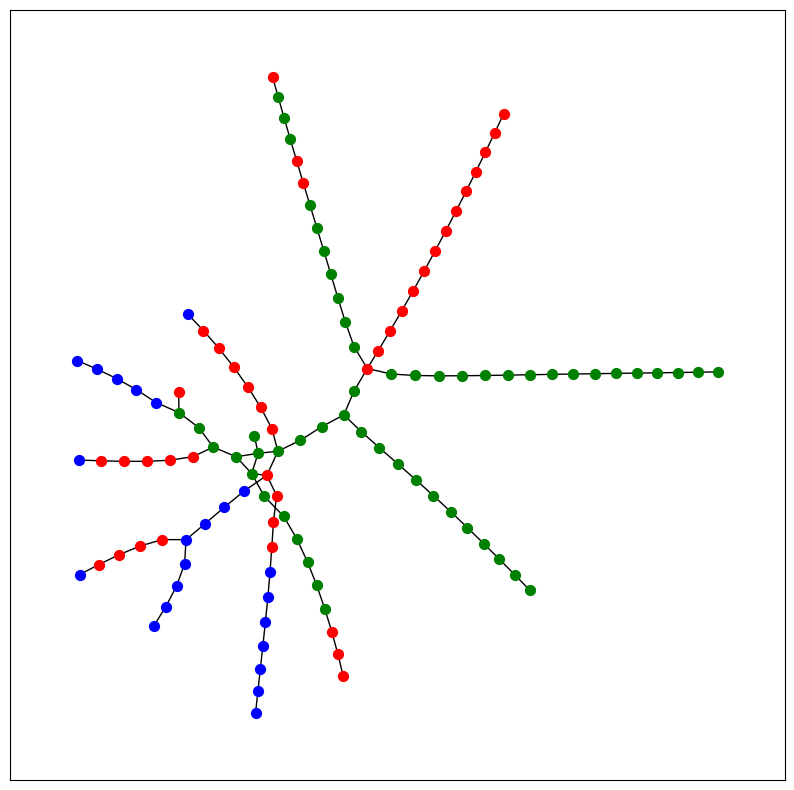

In [13]:
nx.set_node_attributes(network, delays, "avg_delay")

# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
nonnegative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay >= 0]
negative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay < 0]
remaining_nodes = list(set(network.nodes()) - set(nonnegative_delay_nodes) - set(negative_delay_nodes))

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=nonnegative_delay_nodes, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=negative_delay_nodes, node_color='green', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

In [14]:
F

NameError: name 'F' is not defined